<a href="https://colab.research.google.com/github/jai-sundaram/ml_tutorial/blob/main/my_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [ ]:
#polynomial linear regression
#equation:
#y = b0 + b1x1 + b2(x1)^2 + ...... + bn(x1)^n
#instead of the variables themselves changing, it is only the power thatx= changes
#a polynomial regression is still linear, bnecause the relationship between the coefficients for the variables can still be made linear
#just to say it more clearly
#polynomial regression is still a type of linear regression, rather than being a completely new model


In [ ]:
#btw in this project, we will skip the step where we split the dataset because the goal of this project to accurately predict the salary for one person using the position level, so we leveerate the maximum amount of data

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/Position_Salaries.csv')
#in this case, we don't need the first index because it is the same thing as the second column, which basically provides a numerical index/level for each position
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

## Training the Linear Regression model on the whole dataset

In [4]:
from sklearn.linear_model import LinearRegression
#creating a linear regressor object
linreg = LinearRegression()
linreg.fit(X,y)
#building the polynomial regression model
#will build a multiple linea regression model, but instead of having multiple features like x1,x2,x3...
#instead we will have x1, x1^2, x1^n as the features
#process of building this model in python:
#construct a matrix of features but of x1, x1^2, x1^n etc.
#this matrix will be called xpoly
#then, we will create a linear regressor object to integrate these powered featuers in this new linear regressor

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [8]:
#first, like said, we will create this matrix of powered features
from sklearn.preprocessing import PolynomialFeatures
#creating the matrix now
#starting off with n, or powert of 2,
#so right now equation would be: y= b0 + b1x1 + b2(x1)^2
poly_reg = PolynomialFeatures(degree = 4)
#equation:  y= b0 + b1x1 + b2(x1^2) + b3(x1)^3 + b4(x1)^4
#with higher powers we will get even better results
#changed the power to 4
#need to transform the simple matrix of features only containing x1 (just the level column), to a matrix that has x1 as first feature, and x1^2 as second feature
#input the matrix of features that we want to transform
#save it to a new varianle
X_poly = poly_reg.fit_transform(X)
#nnow, we need to buiild a linear regression model that will integrate the features into the new equation
linreg2 = LinearRegression()
#this new model is trained on the matrix that has variables with higher powers
linreg2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

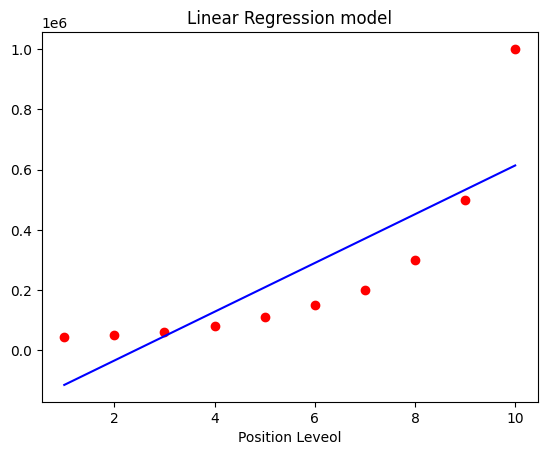

In [9]:
#first, we are going to graph the different points containing the real results (real position levels and salaries)
plt.scatter(X,y, color='red')
#now plootting the linear regression line
#x coordinate is X, the matrix of independent variables, y is the predicted salaries
plt.plot(X, linreg.predict(X), color = 'blue')
#adding title, xlabel, ylabel, then display it
plt.title('Linear Regression model')
plt.xlabel('Position Leveol')
plt.ylabel('')
#showing the graph
plt.show()
#we can see the linear model is not well adapted to the model

## Visualising the Polynomial Regression results

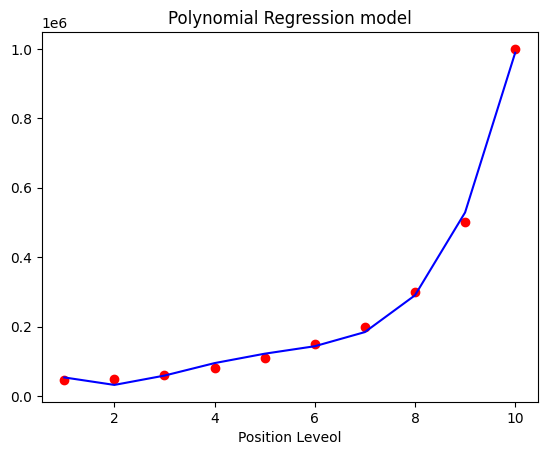

In [12]:
#lets try to use polynomial regression instead
#first, we are going to graph the different points containing the real results (real position levels and salaries)
plt.scatter(X,y, color='red')
#now plootting the linear regression line
#x coordinate is X, the matrix of independent variables, y is the predicted salaries
#applied to transformed matrix of features
#cant keep x because it is the single feature
plt.plot(X, linreg2.predict(X_poly), color = 'blue')
#adding title, xlabel, ylabel, then display it
plt.title('Polynomial Regression model')
plt.xlabel('Position Leveol')
plt.ylabel('')
#showing the graph
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

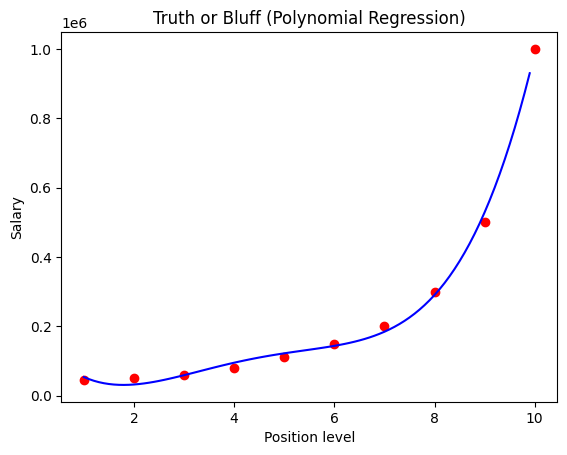

In [15]:
#no need to completely understand this
X_grid = np.arange(min(X['Level']), max(X['Level']), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X['Level'], y, color = 'red')
plt.plot(X_grid, linreg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

## Predicting a new result with Polynomial Regression